<a href="https://colab.research.google.com/github/amrtanair/sentence_Deepex/blob/master/CoLA_dataset_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget

import wget
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

print('Downloading dataset...')
url = 'https://nyu-mll.github.io/CoLA/cola_public_1.1.zip'

if not os.path.exists('./cola_public_1.1.zip'):
    wget.download(url, './cola_public_1.1.zip')

if not os.path.exists('./cola_public/'):
    !unzip cola_public_1.1.zip

In [2]:
df = pd.read_csv("cola_public/raw/in_domain_train.tsv",delimiter='\t', header=None,names=['sentence_source', 'label', 'label_notes', 'sentence'])
columns_to_drop = ['sentence_source', 'label_notes']
df = df.drop(columns=columns_to_drop, axis=1)

print("No. of sentences: ", len(df))

sentence_counts = df['label'].value_counts()

# Print the results
print("Number of sentences with label 0:", sentence_counts[0])
print("Number of sentences with label 1:", sentence_counts[1])

No. of sentences:  8551
Number of sentences with label 0: 2528
Number of sentences with label 1: 6023


In [3]:
df.head(5)

,label,sentence
0,1,"Our friends won't buy this analysis, let alone..."
1,1,One more pseudo generalization and I'm giving up.
2,1,One more pseudo generalization or I'm giving up.
3,1,"The more we study verbs, the crazier they get."
4,1,Day by day the facts are getting murkier.


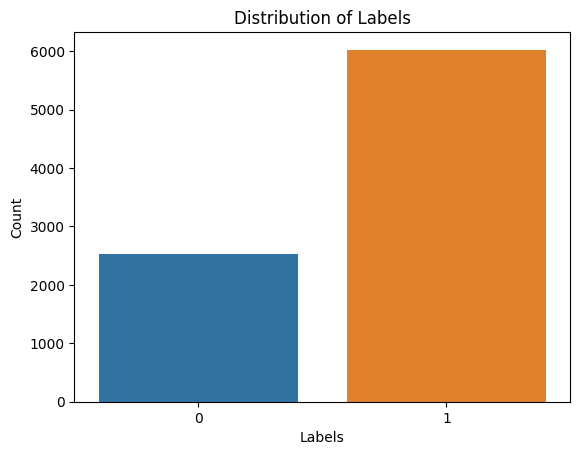

In [4]:
# plot bar graph that shows number of positive and negative labels
sns.countplot(x=df['label'], data=df)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


Average sentence length:  7.696058940474798
Shortest sentence:  2
Longest sentence:  42


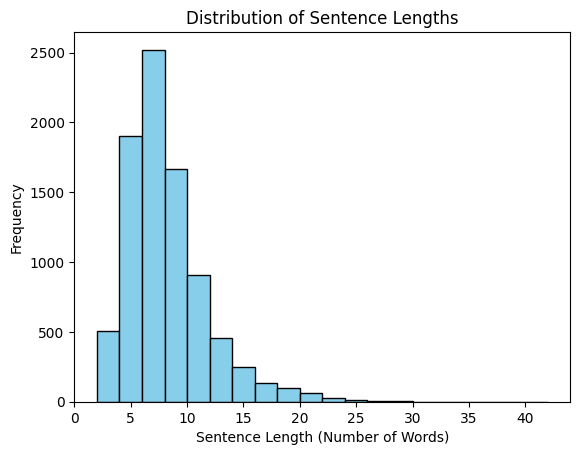

In [5]:
# calculate average sentence length in the dataset
df['sentence_length'] = df['sentence'].apply(lambda x: len(str(x).split()))
print("Average sentence length: ", df['sentence_length'].mean())
print("Shortest sentence: ", df['sentence_length'].min())
print("Longest sentence: ", df['sentence_length'].max())


plt.hist(df['sentence_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')

plt.show()

In [6]:
# conduct statistical tests (e.g., t-tests) to compare the distribution of sentence lengths between the two classes

class_0_lengths = df[df['label'] == 0]['sentence_length']
class_1_lengths = df[df['label'] == 1]['sentence_length']

t_statistic, p_value = ttest_ind(class_0_lengths, class_1_lengths, equal_var=False)
print(f'T-statistic: {t_statistic:.4f}')
print(f'P-value: {p_value:.4f}')
if p_value < 0.05:
    print("The difference in sentence lengths between the two classes is statistically significant.")
else:
    print("There is no significant difference in sentence lengths between the two classes.")


T-statistic: 1.1786
P-value: 0.2386
There is no significant difference in sentence lengths between the two classes.
